<span style="font-family: 'Georgia', serif; font-size: 40px; color: #00000;">Clustering</span>

c:\Users\VSS\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


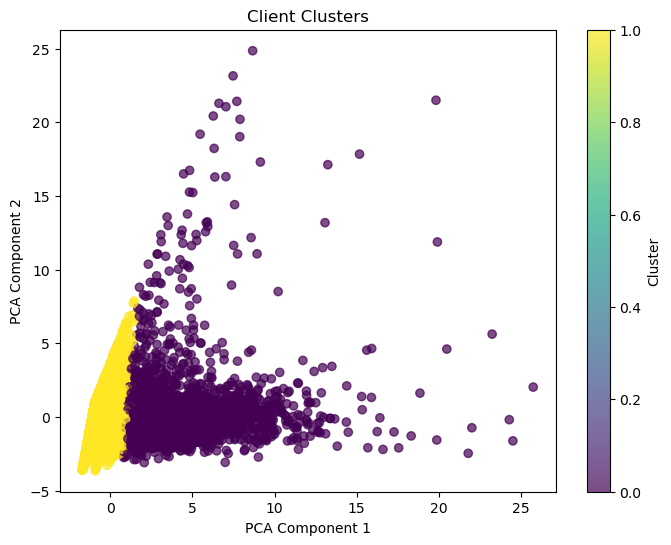

         Total_Number_of_Items   Order_Value  Unique Families Ordered  \
Cluster                                                                 
0                    29.074819  13432.047084                 2.979697   
1                     4.322978   3804.903864                 1.390957   

         Unique Sub-Families Ordered  Popularity Rank  
Cluster                                                
0                          10.364226      2997.779834  
1                           2.117501      4064.018986  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df = pd.read_csv('features_df.csv')

# Select relevant features for clustering
features = ['Total_Number_of_Items',	'Order_Value',	'Unique Families Ordered',	'Unique Sub-Families Ordered',	'Popularity Rank']

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Apply KMeans clustering
n_clusters = 2  # You can choose the number of clusters based on business context
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Reduce dimensionality for visualization (optional)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Client Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Explore cluster characteristics (e.g., mean values)
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


Groupe 0 : Commandes variées et à volume élevé

Grosses commandes : Nettement plus de « Total_Number_of_Items » (29 en moyenne) par rapport au groupe 1.
Valeur élevée : « Order_Value » substantiel, ce qui indique des achats globaux plus importants.
Divers : les commandes contiennent une plus grande variété de produits avec des « familles uniques commandées » et des « sous-familles uniques commandées » plus élevées.
Popularité plus faible : Le « rang de popularité » moyen suggère que ces commandes comprennent souvent des produits moins grand public ou de niche.

Groupe 1 : Commandes plus petites et plus concentrées

Taille modeste : Un « Total_Number_of_Items » moyen beaucoup plus petit (environ 4).
Valeur inférieure : « Order_Value » plus petit par rapport au cluster 0.
Moins de variété : les commandes ont tendance à avoir moins de familles et de sous-familles uniques de produits.
Produits populaires : un « rang de popularité » moyen plus élevé indique que ces commandes peuvent être composées d’articles plus populaires.

Segmentation de la clientèle : Le regroupement semble faire la distinction entre les clients qui effectuent des achats exploratoires importants et de grande valeur (groupe 0) et ceux qui passent des commandes plus petites et ciblées potentiellement motivées par des besoins immédiats (groupe 1).


Campagnes de marketing : Vous pouvez concevoir des campagnes ciblées pour chaque groupe – des promotions sur une variété de produits pour le groupe 0 et des offres sur des articles populaires pour le groupe 1.

<span style="font-family: 'Georgia', serif; font-size: 40px; color: #00000;">ce code est utilise si la societe ne sait pas le nombre optimal de clusters</span>

c:\Users\VSS\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\VSS\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\VSS\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\VSS\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users

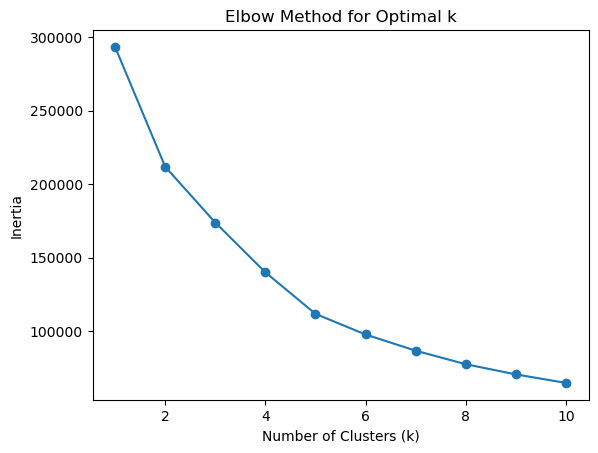

In [2]:
# Determine optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()